In [1]:
import visual_behavior_glm.GLM_analysis_tools as gat
import visual_behavior_glm.GLM_visualization_tools as gvt
import pandas as pd
from multiprocessing import Pool
import numpy as np
from visual_behavior.data_access import loading, utilities, from_lims
import os
pd.set_option('display.max_columns', 500)
import matplotlib.pyplot as plt
import seaborn as sns
from visual_behavior_glm.glm import GLM
import seaborn as sns

import visual_behavior.utilities as vbu

In [45]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
versions = [
    '16_events_engaged_L2_optimize_by_session',
    '16_events_disengaged_L2_optimize_by_session',
    '16_events_all_L2_optimize_by_session'
]

In [6]:
results_raw = []
for version in versions:
    print('loading results for version {}'.format(version))
    results_raw.append(gat.retrieve_results({'glm_version': version}))
results_raw = pd.concat(results_raw, sort=True)

loading results for version 16_events_engaged_L2_optimize_by_session
loading results for version 16_events_disengaged_L2_optimize_by_session
loading results for version 16_events_all_L2_optimize_by_session


In [7]:
results_raw['session_type']

0        OPHYS_3_images_A
1        OPHYS_3_images_A
2        OPHYS_3_images_A
3        OPHYS_3_images_A
4        OPHYS_3_images_A
               ...       
61758    OPHYS_4_images_B
61759    OPHYS_4_images_B
61760    OPHYS_4_images_B
61761    OPHYS_4_images_B
61762    OPHYS_4_images_B
Name: session_type, Length: 194315, dtype: object

In [8]:
behavior_table = loading.get_behavior_model_summary_table()

In [9]:
results = results_raw.merge(
    behavior_table,
    left_on = 'behavior_session_id',
    right_on = 'behavior_session_id',
    how = 'left',
    suffixes = ['', '_duplicated']
)

In [10]:
results['session_type']

0         OPHYS_3_images_A
1         OPHYS_3_images_A
2         OPHYS_3_images_A
3         OPHYS_3_images_A
4         OPHYS_3_images_A
                ...       
194310    OPHYS_4_images_B
194311    OPHYS_4_images_B
194312    OPHYS_4_images_B
194313    OPHYS_4_images_B
194314    OPHYS_4_images_B
Name: session_type, Length: 194315, dtype: object

In [11]:
len(results)

194315

In [12]:
versions_to_compare = ["16_events_engaged_L2_optimize_by_session" , "16_events_disengaged_L2_optimize_by_session"]
version_comparison = gat.get_glm_version_comparison_table(
    versions_to_compare = versions_to_compare,
    results=results.query('glm_version in @versions_to_compare'), 
    metric='Full__avg_cv_var_test'
).rename(columns = {"16_events_engaged_L2_optimize_by_session": "v16_events_engaged_L2_optimize_by_session" , "16_events_disengaged_L2_optimize_by_session":"v16_events_disengaged_L2_optimize_by_session"})

/allen/programs/braintv/workgroups/nc-ophys/Doug/code/visual_behavior_glm/visual_behavior_glm/GLM_analysis_tools.py:536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['identifier'] = results.apply(make_identifier, axis=1)


In [14]:
sample_cell = version_comparison.query('{0} > {1} and {1} > 0.5'.format('v16_events_engaged_L2_optimize_by_session', 'v16_events_disengaged_L2_optimize_by_session')).sample(random_state=0).iloc[0]
sample_cell

identifier                                      906910627_1086519680
v16_events_disengaged_L2_optimize_by_session                0.505184
v16_events_engaged_L2_optimize_by_session                   0.638061
age_in_days                                                      144
behavior_session_id                                        906658064
                                                        ...         
lick_bout_rate_disengaged                                   0.114136
reward_rate_engaged                                        0.0286447
reward_rate_disengaged                                    0.00491149
RT_engaged                                                  0.446638
RT_disengaged                                               0.458304
Name: 35034, Length: 138, dtype: object

In [15]:
sample_cell['v16_events_engaged_L2_optimize_by_session']

0.6380610077593655

In [16]:
sample_cell['v16_events_disengaged_L2_optimize_by_session']

0.5051837590194899

In [17]:
print(sample_cell['ophys_experiment_id'], sample_cell['cell_specimen_id'])

906910627 1086519680


In [18]:
models = {}
for version in ["16_events_engaged_L2_optimize_by_session" , "16_events_disengaged_L2_optimize_by_session", "16_events_all_L2_optimize_by_session"]:
    models[version] = GLM(
        ophys_experiment_id = sample_cell['ophys_experiment_id'],
        version = version, 
        log_results=False, 
        log_weights=False,
        use_previous_fit=True,
        NO_DROPOUTS=True,
    )

importing GLM_fit_tools from /allen/programs/braintv/workgroups/nc-ophys/visual_behavior/ophys_glm/v_16_events_engaged_L2_optimize_by_session/frozen_model_files/GLM_fit_tools.py
loading previous fit...
failed to load previous fit, reload flag is set to True
Fitting ophys_experiment_id: 906910627
WARNING! NO_DROPOUTS=True in fit_experiment(), dropout analysis will NOT run
Loading data
Processing df/f data


/allen/programs/braintv/workgroups/nc-ophys/Doug/code/AllenSDK/allensdk/brain_observatory/sync_dataset.py:109: UserWarning: The loaded sync file contains the following deprecated line label keys: {'cam1_exposure', 'cam2_exposure'}. Consider updating the sync file line labels.
  self._check_line_labels()
/allen/programs/braintv/workgroups/nc-ophys/Doug/code/AllenSDK/allensdk/brain_observatory/sync_dataset.py:109: UserWarning: The loaded sync file contains the following deprecated line label keys: {'cam1_exposure', 'cam2_exposure'}. Consider updating the sync file line labels.
  self._check_line_labels()


Using detected events instead of df/f


/allen/programs/braintv/workgroups/nc-ophys/Doug/code/AllenSDK/allensdk/brain_observatory/behavior/metadata/behavior_metadata.py:226: UserWarning: The `date_of_acquisition` field in LIMS (2019-07-15 11:15:20.640855+00:00) for behavior session (906658064) deviates by more than an hour from the `start_time` (2019-07-15 12:18:06.720000+00:00) specified in the associated stimulus *.pkl file: /allen/programs/braintv/production/visualbehavior/prod0/specimen_843122504/behavior_session_906658064/906521029.pkl
  warnings.warn(


Adding Engagement labels. Preferred engagement state: engaged
	% of session engaged:    0.8128329798789634
	% of session disengaged: 0.1871670201210366
Build Design Matrix
    Adding kernel: intercept
    Adding kernel: time
    Adding kernel: licks
    Adding kernel: hits
    Adding kernel: misses
    Adding kernel: passive_change
	Error encountered while adding kernel for passive_change. Attemping to continue without this kernel.
	Passive Change kernel cant be added to active sessions
    Adding kernel: false_alarms
	Error encountered while adding kernel for false_alarms. Attemping to continue without this kernel.
	Less than minimum number of events in preferred engagement state: 4 false_alarm
	Total number of events: 8
	Preferred events:       4
	Non-Preferred events:   4
    Adding kernel: correct_rejects
    Adding kernel: omissions
    Adding kernel: running


/allen/programs/braintv/workgroups/nc-ophys/Doug/code/AllenSDK/allensdk/brain_observatory/behavior/running_processing.py:363: UserWarning: Time array is 1 value shorter than encoder array. Last encoder value removed

  warnings.warn(


                 : Normalized by max value: 100
    Adding kernel: pupil


/allen/programs/braintv/workgroups/nc-ophys/Doug/code/AllenSDK/allensdk/brain_observatory/sync_dataset.py:109: UserWarning: The loaded sync file contains the following deprecated line label keys: {'cam1_exposure', 'cam2_exposure'}. Consider updating the sync file line labels.
  self._check_line_labels()
/allen/programs/braintv/workgroups/nc-ophys/Doug/code/AllenSDK/allensdk/brain_observatory/sync_dataset.py:109: UserWarning: The loaded sync file contains the following deprecated line label keys: {'cam1_exposure', 'cam2_exposure'}. Consider updating the sync file line labels.
  self._check_line_labels()


                 : Mean Centering
                 : Standardized to unit variance
    Adding kernel: face_motion_PC_0
                 : Mean Centering
                 : Standardized to unit variance
    Adding kernel: face_motion_PC_1
                 : Mean Centering
                 : Standardized to unit variance
    Adding kernel: face_motion_PC_2
                 : Mean Centering
                 : Standardized to unit variance
    Adding kernel: face_motion_PC_3
                 : Mean Centering
                 : Standardized to unit variance
    Adding kernel: face_motion_PC_4
                 : Mean Centering
                 : Standardized to unit variance
    Adding kernel: image0
    Adding kernel: image1
    Adding kernel: image2
    Adding kernel: image3
    Adding kernel: image4
    Adding kernel: image5
    Adding kernel: image6
    Adding kernel: image7
    Adding kernel: model_bias
                 : Mean Centering
                 : Standardized to unit variance
 

    Fitting L2, 0.1:   0%|          | 0/5 [00:00<?, ?it/s]

Trimming Design Matrix by engagement
Setting up CV
Evaluating Regularization values
Evaluating a grid of regularization values


    Fitting L2, 500.0: 100%|██████████| 5/5 [00:02<00:00,  2.42it/s]


Setting up model selection dropout
Iterating over model selection
Using a constant regularization value across all cells


    Fitting model, Full: 100%|██████████| 5/5 [00:02<00:00,  1.75it/s]


Saving results
Saving Events Table
Finished
done fitting model, collecting results
done collecting results
done building GLM object
importing GLM_fit_tools from /allen/programs/braintv/workgroups/nc-ophys/visual_behavior/ophys_glm/v_16_events_disengaged_L2_optimize_by_session/frozen_model_files/GLM_fit_tools.py
loading previous fit...
    Adding kernel: intercept
    Adding kernel: time
    Adding kernel: licks


/allen/programs/braintv/workgroups/nc-ophys/Doug/code/AllenSDK/allensdk/brain_observatory/sync_dataset.py:109: UserWarning: The loaded sync file contains the following deprecated line label keys: {'cam1_exposure', 'cam2_exposure'}. Consider updating the sync file line labels.
  self._check_line_labels()


    Adding kernel: hits
    Adding kernel: misses
    Adding kernel: passive_change
	Error encountered while adding kernel for passive_change. Attemping to continue without this kernel.
	Passive Change kernel cant be added to active sessions


/allen/programs/braintv/workgroups/nc-ophys/Doug/code/AllenSDK/allensdk/brain_observatory/sync_dataset.py:109: UserWarning: The loaded sync file contains the following deprecated line label keys: {'cam1_exposure', 'cam2_exposure'}. Consider updating the sync file line labels.
  self._check_line_labels()
/allen/programs/braintv/workgroups/nc-ophys/Doug/code/AllenSDK/allensdk/brain_observatory/behavior/metadata/behavior_metadata.py:226: UserWarning: The `date_of_acquisition` field in LIMS (2019-07-15 11:15:20.640855+00:00) for behavior session (906658064) deviates by more than an hour from the `start_time` (2019-07-15 12:18:06.720000+00:00) specified in the associated stimulus *.pkl file: /allen/programs/braintv/production/visualbehavior/prod0/specimen_843122504/behavior_session_906658064/906521029.pkl
  warnings.warn(


    Adding kernel: false_alarms
	Error encountered while adding kernel for false_alarms. Attemping to continue without this kernel.
	Less than minimum number of events in preferred engagement state: 4 false_alarm
	Total number of events: 8
	Preferred events:       4
	Non-Preferred events:   4
    Adding kernel: correct_rejects
    Adding kernel: omissions
    Adding kernel: running


/allen/programs/braintv/workgroups/nc-ophys/Doug/code/AllenSDK/allensdk/brain_observatory/behavior/running_processing.py:363: UserWarning: Time array is 1 value shorter than encoder array. Last encoder value removed

  warnings.warn(


                 : Normalized by max value: 100
    Adding kernel: pupil


/allen/programs/braintv/workgroups/nc-ophys/Doug/code/AllenSDK/allensdk/brain_observatory/sync_dataset.py:109: UserWarning: The loaded sync file contains the following deprecated line label keys: {'cam1_exposure', 'cam2_exposure'}. Consider updating the sync file line labels.
  self._check_line_labels()
/allen/programs/braintv/workgroups/nc-ophys/Doug/code/AllenSDK/allensdk/brain_observatory/sync_dataset.py:109: UserWarning: The loaded sync file contains the following deprecated line label keys: {'cam1_exposure', 'cam2_exposure'}. Consider updating the sync file line labels.
  self._check_line_labels()


                 : Mean Centering
                 : Standardized to unit variance
    Adding kernel: face_motion_PC_0
                 : Mean Centering
                 : Standardized to unit variance
    Adding kernel: face_motion_PC_1
                 : Mean Centering
                 : Standardized to unit variance
    Adding kernel: face_motion_PC_2
                 : Mean Centering
                 : Standardized to unit variance
    Adding kernel: face_motion_PC_3
                 : Mean Centering
                 : Standardized to unit variance
    Adding kernel: face_motion_PC_4
                 : Mean Centering
                 : Standardized to unit variance
    Adding kernel: image0
    Adding kernel: image1
    Adding kernel: image2
    Adding kernel: image3
    Adding kernel: image4
    Adding kernel: image5
    Adding kernel: image6
    Adding kernel: image7
    Adding kernel: model_bias
                 : Mean Centering
                 : Standardized to unit variance
 

/allen/programs/braintv/workgroups/nc-ophys/Doug/code/AllenSDK/allensdk/brain_observatory/sync_dataset.py:109: UserWarning: The loaded sync file contains the following deprecated line label keys: {'cam1_exposure', 'cam2_exposure'}. Consider updating the sync file line labels.
  self._check_line_labels()
/allen/programs/braintv/workgroups/nc-ophys/Doug/code/AllenSDK/allensdk/brain_observatory/sync_dataset.py:109: UserWarning: The loaded sync file contains the following deprecated line label keys: {'cam1_exposure', 'cam2_exposure'}. Consider updating the sync file line labels.
  self._check_line_labels()


Using detected events instead of df/f


/allen/programs/braintv/workgroups/nc-ophys/Doug/code/AllenSDK/allensdk/brain_observatory/behavior/metadata/behavior_metadata.py:226: UserWarning: The `date_of_acquisition` field in LIMS (2019-07-15 11:15:20.640855+00:00) for behavior session (906658064) deviates by more than an hour from the `start_time` (2019-07-15 12:18:06.720000+00:00) specified in the associated stimulus *.pkl file: /allen/programs/braintv/production/visualbehavior/prod0/specimen_843122504/behavior_session_906658064/906521029.pkl
  warnings.warn(


Adding Engagement labels. Preferred engagement state: disengaged
	% of session engaged:    0.8128329798789634
	% of session disengaged: 0.1871670201210366
Build Design Matrix
    Adding kernel: intercept
    Adding kernel: time
    Adding kernel: licks
    Adding kernel: hits
    Adding kernel: misses
    Adding kernel: correct_rejects
    Adding kernel: omissions
    Adding kernel: running


/allen/programs/braintv/workgroups/nc-ophys/Doug/code/AllenSDK/allensdk/brain_observatory/behavior/running_processing.py:363: UserWarning: Time array is 1 value shorter than encoder array. Last encoder value removed

  warnings.warn(


                 : Normalized by max value: 100
    Adding kernel: pupil


/allen/programs/braintv/workgroups/nc-ophys/Doug/code/AllenSDK/allensdk/brain_observatory/sync_dataset.py:109: UserWarning: The loaded sync file contains the following deprecated line label keys: {'cam1_exposure', 'cam2_exposure'}. Consider updating the sync file line labels.
  self._check_line_labels()
/allen/programs/braintv/workgroups/nc-ophys/Doug/code/AllenSDK/allensdk/brain_observatory/sync_dataset.py:109: UserWarning: The loaded sync file contains the following deprecated line label keys: {'cam1_exposure', 'cam2_exposure'}. Consider updating the sync file line labels.
  self._check_line_labels()


                 : Mean Centering
                 : Standardized to unit variance
    Adding kernel: face_motion_PC_0
                 : Mean Centering
                 : Standardized to unit variance
    Adding kernel: face_motion_PC_1
                 : Mean Centering
                 : Standardized to unit variance
    Adding kernel: face_motion_PC_2
                 : Mean Centering
                 : Standardized to unit variance
    Adding kernel: face_motion_PC_3
                 : Mean Centering
                 : Standardized to unit variance
    Adding kernel: face_motion_PC_4


    Fitting L2, 0.1:   0%|          | 0/5 [00:00<?, ?it/s]

                 : Mean Centering
                 : Standardized to unit variance
    Adding kernel: image0
    Adding kernel: image1
    Adding kernel: image2
    Adding kernel: image3
    Adding kernel: image4
    Adding kernel: image5
    Adding kernel: image6
    Adding kernel: image7
    Adding kernel: model_bias
                 : Mean Centering
                 : Standardized to unit variance
    Adding kernel: model_task0
                 : Mean Centering
                 : Standardized to unit variance
    Adding kernel: model_omissions1
                 : Mean Centering
                 : Standardized to unit variance
    Adding kernel: model_timing1D
                 : Mean Centering
                 : Standardized to unit variance
Splitting fit dictionary entries by engagement
Trimming Design Matrix by engagement
Setting up CV
Evaluating Regularization values
Evaluating a grid of regularization values


    Fitting L2, 500.0: 100%|██████████| 5/5 [00:01<00:00,  4.37it/s]


Setting up model selection dropout
Iterating over model selection
Using a constant regularization value across all cells


    Fitting model, Full: 100%|██████████| 5/5 [00:01<00:00,  3.63it/s]


Saving results
Saving Events Table
Finished
done fitting model, collecting results
done collecting results
done building GLM object
importing GLM_fit_tools from /allen/programs/braintv/workgroups/nc-ophys/visual_behavior/ophys_glm/v_16_events_all_L2_optimize_by_session/frozen_model_files/GLM_fit_tools.py
loading previous fit...
    Adding kernel: intercept
    Adding kernel: time
    Adding kernel: licks


/allen/programs/braintv/workgroups/nc-ophys/Doug/code/AllenSDK/allensdk/brain_observatory/sync_dataset.py:109: UserWarning: The loaded sync file contains the following deprecated line label keys: {'cam1_exposure', 'cam2_exposure'}. Consider updating the sync file line labels.
  self._check_line_labels()


    Adding kernel: hits
    Adding kernel: misses
    Adding kernel: passive_change
	Error encountered while adding kernel for passive_change. Attemping to continue without this kernel.
	Passive Change kernel cant be added to active sessions


/allen/programs/braintv/workgroups/nc-ophys/Doug/code/AllenSDK/allensdk/brain_observatory/sync_dataset.py:109: UserWarning: The loaded sync file contains the following deprecated line label keys: {'cam1_exposure', 'cam2_exposure'}. Consider updating the sync file line labels.
  self._check_line_labels()
/allen/programs/braintv/workgroups/nc-ophys/Doug/code/AllenSDK/allensdk/brain_observatory/behavior/metadata/behavior_metadata.py:226: UserWarning: The `date_of_acquisition` field in LIMS (2019-07-15 11:15:20.640855+00:00) for behavior session (906658064) deviates by more than an hour from the `start_time` (2019-07-15 12:18:06.720000+00:00) specified in the associated stimulus *.pkl file: /allen/programs/braintv/production/visualbehavior/prod0/specimen_843122504/behavior_session_906658064/906521029.pkl
  warnings.warn(


    Adding kernel: false_alarms
    Adding kernel: correct_rejects
    Adding kernel: omissions
    Adding kernel: running


/allen/programs/braintv/workgroups/nc-ophys/Doug/code/AllenSDK/allensdk/brain_observatory/behavior/running_processing.py:363: UserWarning: Time array is 1 value shorter than encoder array. Last encoder value removed

  warnings.warn(


                 : Normalized by max value: 100
    Adding kernel: pupil


/allen/programs/braintv/workgroups/nc-ophys/Doug/code/AllenSDK/allensdk/brain_observatory/sync_dataset.py:109: UserWarning: The loaded sync file contains the following deprecated line label keys: {'cam1_exposure', 'cam2_exposure'}. Consider updating the sync file line labels.
  self._check_line_labels()
/allen/programs/braintv/workgroups/nc-ophys/Doug/code/AllenSDK/allensdk/brain_observatory/sync_dataset.py:109: UserWarning: The loaded sync file contains the following deprecated line label keys: {'cam1_exposure', 'cam2_exposure'}. Consider updating the sync file line labels.
  self._check_line_labels()


                 : Mean Centering
                 : Standardized to unit variance
    Adding kernel: face_motion_PC_0
                 : Mean Centering
                 : Standardized to unit variance
    Adding kernel: face_motion_PC_1
                 : Mean Centering
                 : Standardized to unit variance
    Adding kernel: face_motion_PC_2
                 : Mean Centering
                 : Standardized to unit variance
    Adding kernel: face_motion_PC_3
                 : Mean Centering
                 : Standardized to unit variance
    Adding kernel: face_motion_PC_4
                 : Mean Centering
                 : Standardized to unit variance
    Adding kernel: image0
    Adding kernel: image1
    Adding kernel: image2
    Adding kernel: image3
    Adding kernel: image4
    Adding kernel: image5
    Adding kernel: image6
    Adding kernel: image7
    Adding kernel: model_bias
                 : Mean Centering
                 : Standardized to unit variance
 

In [19]:
sample_cell['cell_specimen_id']

1086519680

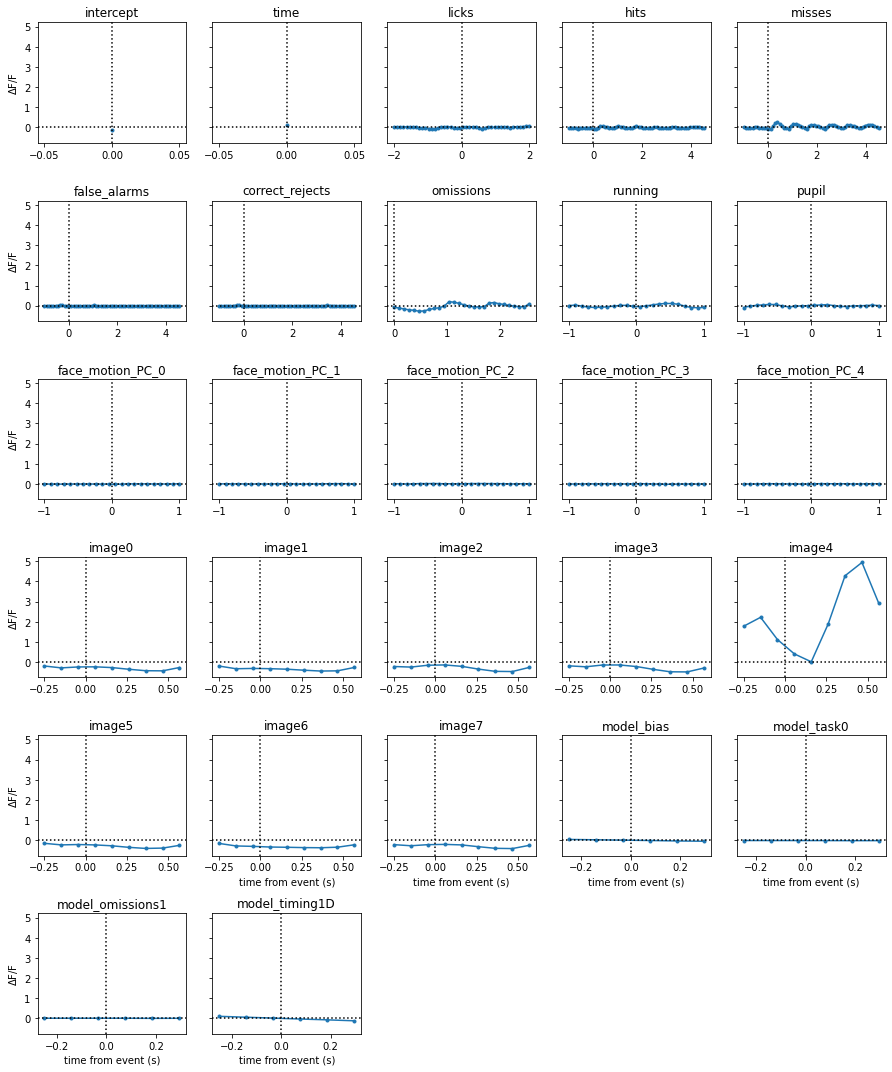

In [20]:
models['16_events_all_L2_optimize_by_session'].plot_filters(sample_cell['cell_specimen_id'])

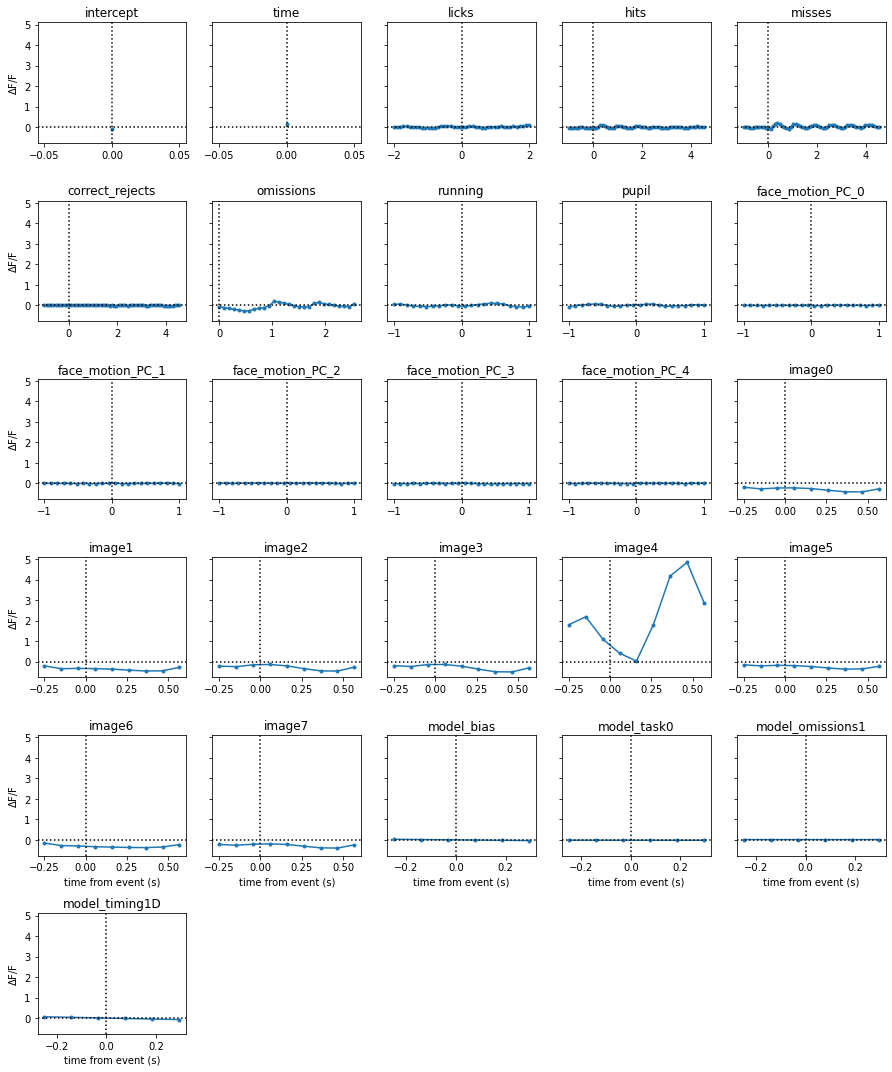

In [21]:
models['16_events_engaged_L2_optimize_by_session'].plot_filters(sample_cell['cell_specimen_id'])

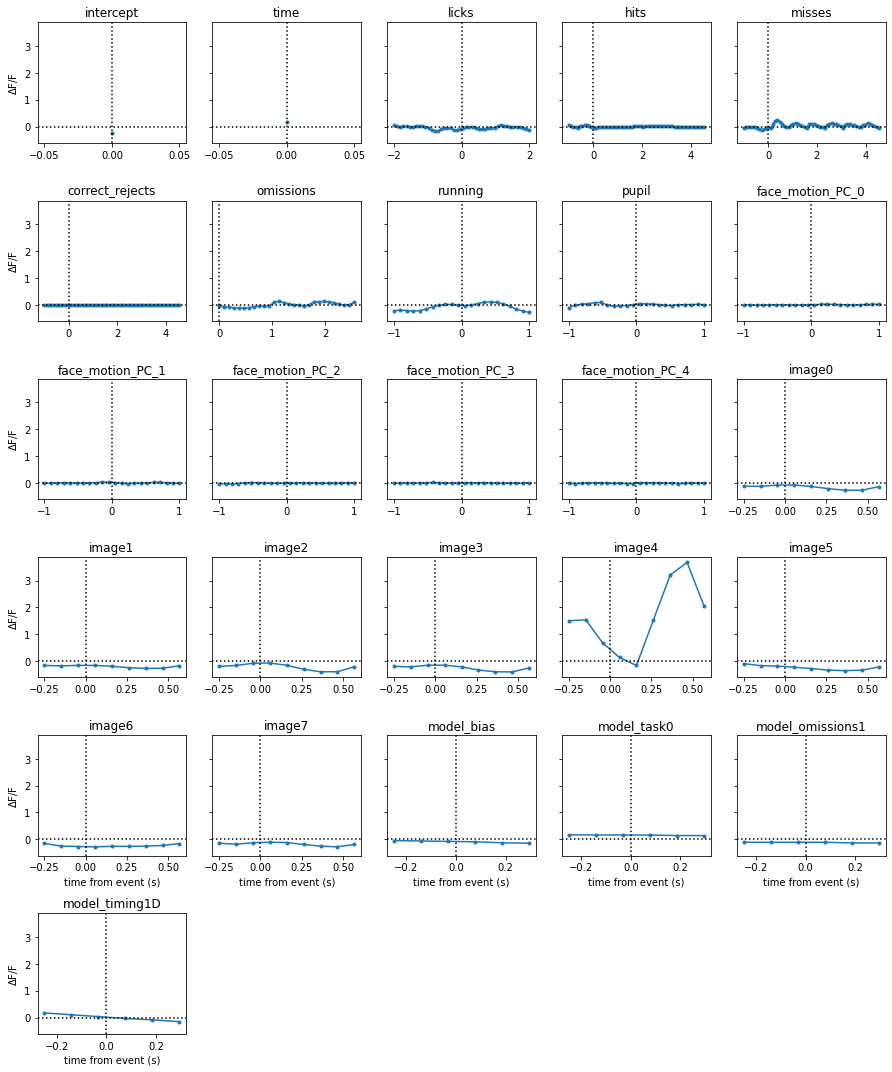

In [22]:
models['16_events_disengaged_L2_optimize_by_session'].plot_filters(sample_cell['cell_specimen_id'])

In [23]:
dataset = loading.get_ophys_dataset(sample_cell['ophys_experiment_id'])
neural_data = utilities.build_tidy_cell_df(dataset)

/allen/programs/braintv/workgroups/nc-ophys/Doug/code/AllenSDK/allensdk/brain_observatory/sync_dataset.py:109: UserWarning: The loaded sync file contains the following deprecated line label keys: {'cam1_exposure', 'cam2_exposure'}. Consider updating the sync file line labels.
  self._check_line_labels()


In [24]:
behavior_session_id = from_lims.get_behavior_session_id_for_ophys_experiment_id(sample_cell['ophys_experiment_id'])
behavior_model_df = loading.load_behavior_model_outputs(behavior_session_id)
behavior_model_df

,stimulus_presentations_id,lick_bout_start,lick_bout_end,lick_bout_rate,rewarded_lick_bout,lick_hit_fraction,hit_rate,miss_rate,false_alarm_rate,correct_reject_rate,d_prime,criterion,RT,engaged,in_lick_bout,bias,omissions,omissions1,task0,timing1D
0,0,False,False,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-2.326348,NaN,False,0,-0.591270,-0.647111,1.662701,2.163483,-0.624595
1,1,True,True,0.333333,0.0,0.000000,0.000000,0.000000,0.250000,0.750000,-1.651858,-1.500419,0.016698,False,0,-0.588431,-0.647116,1.662701,2.163472,-0.673594
2,2,False,False,0.444444,0.0,0.000000,0.000000,0.000000,0.333333,0.666667,-1.895621,-1.378538,0.016698,False,0,-0.589733,-0.647115,1.662701,2.163489,-0.652292
3,3,True,True,0.500000,0.0,0.000000,0.000000,0.000000,0.375000,0.625000,-2.007709,-1.322494,0.583820,False,0,-0.589159,-0.647033,1.662701,2.163494,-0.662837
4,4,False,False,0.533333,0.0,0.000000,0.000000,0.000000,0.400000,0.600000,-2.073001,-1.289847,0.583820,False,0,-0.590116,-0.646949,1.662701,2.163509,-0.648804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,4798,False,False,0.121276,1.0,0.334121,0.540823,0.459177,0.063314,0.936686,1.630045,-0.712515,0.650540,True,1,-4.168012,0.252566,1.660672,1.837946,4.943127
4799,4799,False,False,0.121224,1.0,0.333405,0.538073,0.461927,0.063402,0.936598,1.622408,-0.715624,0.650540,True,1,-4.168012,0.252566,1.660672,1.837946,4.943127
4800,4800,False,False,0.121198,1.0,0.332617,0.535330,0.464670,0.063511,0.936489,1.614627,-0.718639,0.650540,True,1,-4.168012,0.252566,1.660672,1.837946,4.943127
4801,4801,False,True,0.121198,1.0,0.331758,0.532594,0.467406,0.063641,0.936359,1.606704,-0.721560,0.650540,True,1,-4.168012,0.252566,1.660672,1.837946,4.943127


In [25]:
stim_df = dataset.stimulus_presentations.merge(
    behavior_model_df,
    left_on = 'stimulus_presentations_id',
    right_on = 'stimulus_presentations_id'
)
stim_df

/allen/programs/braintv/workgroups/nc-ophys/Doug/code/AllenSDK/allensdk/brain_observatory/sync_dataset.py:109: UserWarning: The loaded sync file contains the following deprecated line label keys: {'cam1_exposure', 'cam2_exposure'}. Consider updating the sync file line labels.
  self._check_line_labels()


,stimulus_presentations_id,duration,end_frame,image_index,image_name,image_set,index,is_change,omitted,start_frame,start_time,stop_time,lick_bout_start,lick_bout_end,lick_bout_rate,rewarded_lick_bout,lick_hit_fraction,hit_rate,miss_rate,false_alarm_rate,correct_reject_rate,d_prime,criterion,RT,engaged,in_lick_bout,bias,omissions,omissions1,task0,timing1D
0,0,0.25021,18001.0,0,im000,Natural_Images_Lum_Matched_set_ophys_6_2017.07.14,0,False,False,17986,307.31115,307.56136,False,False,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-2.326348,NaN,False,0,-0.591270,-0.647111,1.662701,2.163483,-0.624595
1,1,0.25022,18046.0,0,im000,Natural_Images_Lum_Matched_set_ophys_6_2017.07.14,1,False,False,18031,308.06175,308.31197,True,True,0.333333,0.0,0.000000,0.000000,0.000000,0.250000,0.750000,-1.651858,-1.500419,0.016698,False,0,-0.588431,-0.647116,1.662701,2.163472,-0.673594
2,2,NaN,NaN,8,omitted,omitted,0,False,True,18075,308.79570,NaN,False,False,0.444444,0.0,0.000000,0.000000,0.000000,0.333333,0.666667,-1.895621,-1.378538,0.016698,False,0,-0.589733,-0.647115,1.662701,2.163489,-0.652292
3,3,0.25021,18136.0,0,im000,Natural_Images_Lum_Matched_set_ophys_6_2017.07.14,2,False,False,18121,309.56299,309.81320,True,True,0.500000,0.0,0.000000,0.000000,0.000000,0.375000,0.625000,-2.007709,-1.322494,0.583820,False,0,-0.589159,-0.647033,1.662701,2.163494,-0.662837
4,4,0.25013,18181.0,0,im000,Natural_Images_Lum_Matched_set_ophys_6_2017.07.14,3,False,False,18166,310.31363,310.56376,False,False,0.533333,0.0,0.000000,0.000000,0.000000,0.400000,0.600000,-2.073001,-1.289847,0.583820,False,0,-0.590116,-0.646949,1.662701,2.163509,-0.648804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,4798,0.25020,233950.0,6,im031,Natural_Images_Lum_Matched_set_ophys_6_2017.07.14,4632,False,False,233935,3909.40245,3909.65265,False,False,0.121276,1.0,0.334121,0.540823,0.459177,0.063314,0.936686,1.630045,-0.712515,0.650540,True,1,-4.168012,0.252566,1.660672,1.837946,4.943127
4799,4799,0.25020,233995.0,6,im031,Natural_Images_Lum_Matched_set_ophys_6_2017.07.14,4633,False,False,233980,3910.15306,3910.40326,False,False,0.121224,1.0,0.333405,0.538073,0.461927,0.063402,0.936598,1.622408,-0.715624,0.650540,True,1,-4.168012,0.252566,1.660672,1.837946,4.943127
4800,4800,0.25020,234041.0,6,im031,Natural_Images_Lum_Matched_set_ophys_6_2017.07.14,4634,False,False,234026,3910.92038,3911.17058,False,False,0.121198,1.0,0.332617,0.535330,0.464670,0.063511,0.936489,1.614627,-0.718639,0.650540,True,1,-4.168012,0.252566,1.660672,1.837946,4.943127
4801,4801,0.25022,234086.0,6,im031,Natural_Images_Lum_Matched_set_ophys_6_2017.07.14,4635,False,False,234071,3911.67096,3911.92118,False,True,0.121198,1.0,0.331758,0.532594,0.467406,0.063641,0.936359,1.606704,-0.721560,0.650540,True,1,-4.168012,0.252566,1.660672,1.837946,4.943127


In [27]:
engagement_df = pd.DataFrame({'timestamps': neural_data['timestamps'].unique()})
for idx, row in engagement_df.iterrows():
    nearest_behavior_index = np.abs(row['timestamps'] - stim_df['start_time']).idxmin()
    engagement_df.at[idx, 'engaged'] = stim_df.loc[nearest_behavior_index]['engaged']

In [28]:
engagement_df

,timestamps,engaged
0,7.35277,False
1,7.44600,False
2,7.53923,False
3,7.63245,False
4,7.72568,False
...,...,...
48315,4513.02913,True
48316,4513.12239,True
48317,4513.21565,True
48318,4513.30890,True


In [30]:
engagement_df['engaged'].value_counts()

True     37869
False    10451
Name: engaged, dtype: int64

In [31]:
neural_data.merge(
    engagement_df,
    left_on = 'timestamps',
    right_on = 'timestamps',
)

,timestamps,cell_roi_id,cell_specimen_id,dff,events,filtered_events,engaged
0,7.35277,1080786124,1086532150,0.283955,0.000000,0.000000,False
1,7.35277,1080786140,1086519497,0.236787,0.000000,0.000000,False
2,7.35277,1080786194,1086512045,0.080651,0.000000,0.000000,False
3,7.35277,1080786211,1086525369,0.545490,0.000000,0.000000,False
4,7.35277,1080786218,1086510676,0.244837,0.000000,0.000000,False
...,...,...,...,...,...,...,...
2126075,4513.40216,1080787481,1086525220,0.258853,0.000000,0.000000,True
2126076,4513.40216,1080787495,1086508613,0.393701,0.000000,0.000000,True
2126077,4513.40216,1080787515,1086509036,1.141019,0.737831,0.245402,True
2126078,4513.40216,1080787639,1086511157,0.129287,0.000000,0.000000,True


In [75]:
%time
etrs = {}
for engagement_state in [True, False]:
    etrs['engaged == {}'.format(engagement_state)] = vbu.event_triggered_response(
        neural_data.query('cell_specimen_id == {}'.format(sample_cell['cell_specimen_id'])),
        parameter = 'filtered_events',
        event_times = stim_df.query('image_index == 4 and engaged == @engagement_state')['start_time'],
        t_before=3,
        t_after=3,
    )

CPU times: user 4 µs, sys: 7 µs, total: 11 µs
Wall time: 24.1 µs


In [33]:
%matplotlib notebook

In [37]:
def get_kernel_weights(glm, kernel_name, cell_specimen_id):
    kernel_list = list(glm.design.kernel_dict.keys())
    all_weight_names = glm.X.weights.values

    t = np.linspace(
        0,
        glm.design.kernel_dict[kernel_name]['kernel_length_samples']/glm.fit['ophys_frame_rate'],
        glm.design.kernel_dict[kernel_name]['kernel_length_samples']
    )
    t += glm.design.kernel_dict[kernel_name]['offset_seconds']
    kernel_weight_names = [w for w in all_weight_names if w.startswith(kernel_name)]
    w_kernel = glm.W.loc[dict(weights=kernel_weight_names, cell_specimen_id=cell_specimen_id)]
    
    return t, w_kernel


<IPython.core.display.Javascript object>


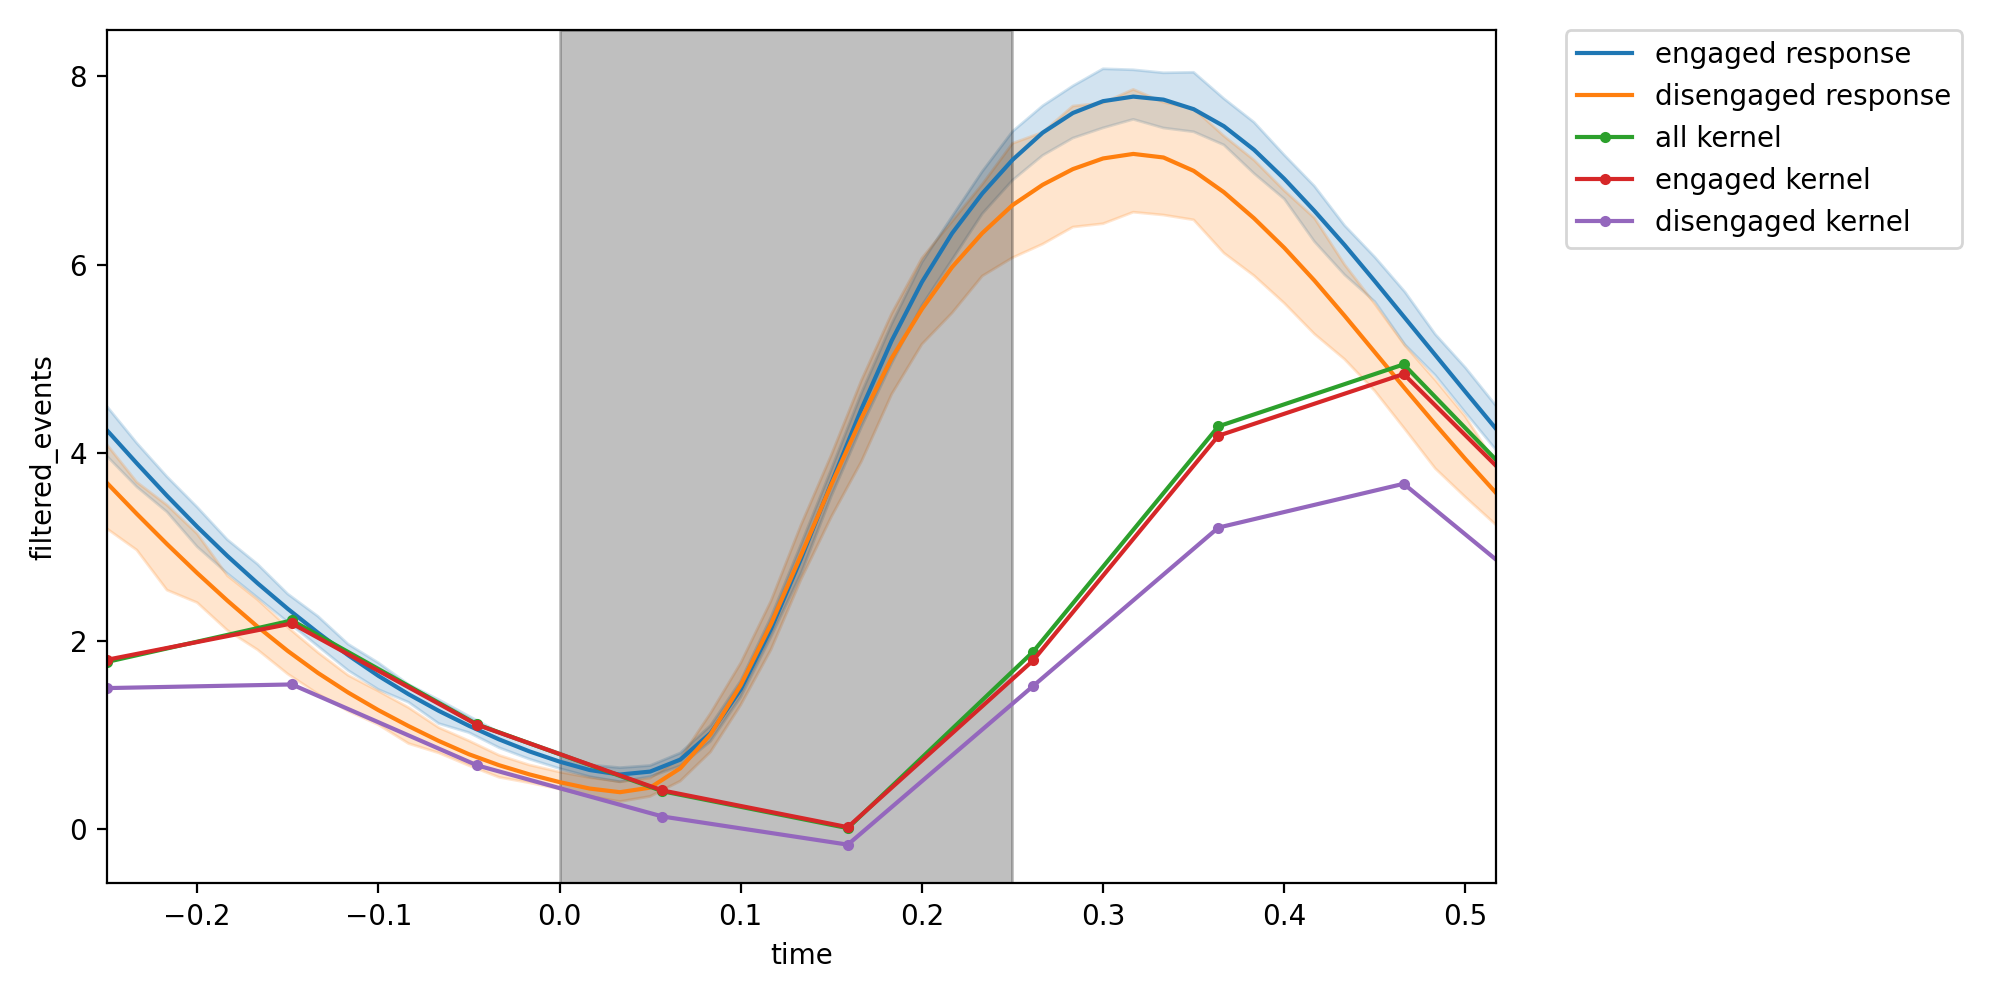

In [76]:
fig, ax = plt.subplots(figsize = (10,5))
for key in etrs.keys():
    sns.lineplot(
        data=etrs[key],
        x='time',
        y='filtered_events',
        n_boot=100,
        ax = ax
    )

ax.set_xlim(-0.25, -0.25+0.767)
for tstart in [0, 0.75, 1.5]:
    ax.axvspan(tstart, tstart+0.25, color='black',alpha=0.25)

legend_text = ['engaged response','disengaged response']

for e in ['all','engaged','disengaged']:
    glm =  models["16_events_{}_L2_optimize_by_session".format(e)]
    t_kernel, w_kernel= get_kernel_weights(glm, kernel_name='image4', cell_specimen_id=sample_cell['cell_specimen_id'])
    ax.plot(
        t_kernel,
        w_kernel,
        marker = '.'
    )
    legend_text.append('{} kernel'.format(e))
    
ax.legend(legend_text, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

fig.tight_layout()

In [77]:
t_kernel

array([-0.25      , -0.14772727, -0.04545455,  0.05681818,  0.15909091,
        0.26136364,  0.36363636,  0.46590909,  0.56818182])

<IPython.core.display.Javascript object>


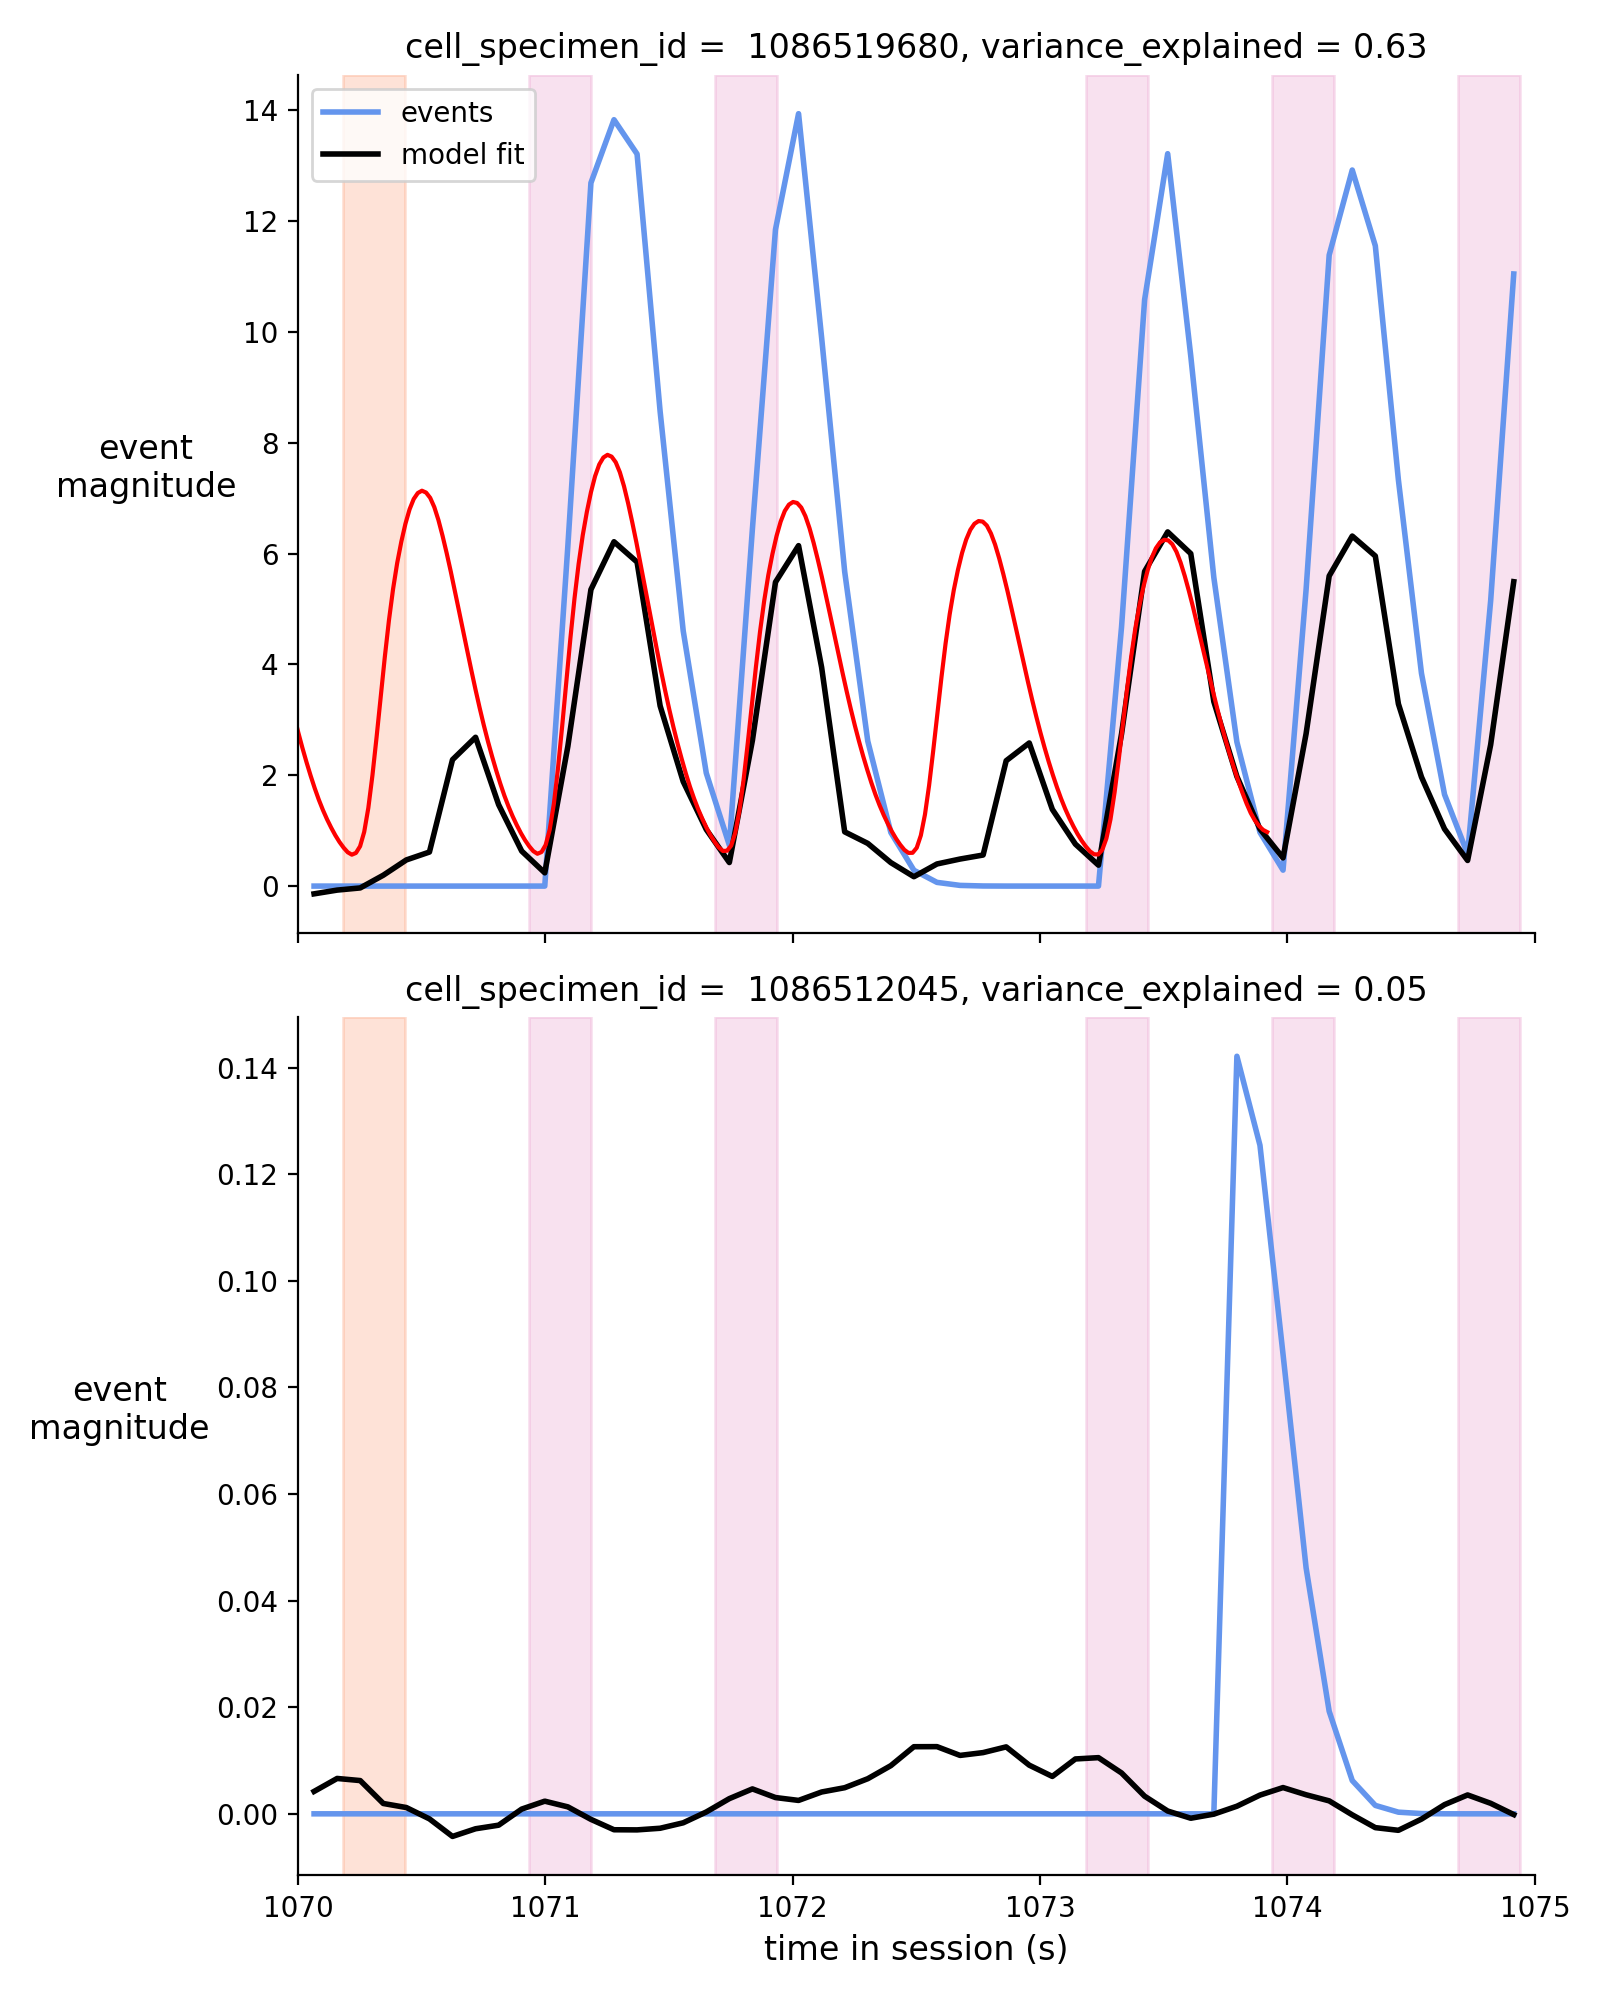

In [84]:
fig, ax = gvt.plot_sample_cells(
    glm = models['16_events_all_L2_optimize_by_session'], 
    cell_specimen_ids = [1086519680, 1086512045], 
    t0 = 1070, 
    t1 = 1075, 
    figwidth=8, 
    height_per_cell=5, 
    title='cell_specimen_id'
)
etr_mean = etrs['engaged == True'].groupby('time').mean().reset_index()
ax[0].plot(
    etr_mean['time'] + 1070.93466,
    etr_mean['filtered_events'],
    color='red'
)

In [70]:
etr_mean = etrs['engaged == True'].groupby('time').mean().reset_index()
ax[0].plot(
    etr_mean['time'] + 1070.93466,
    etr_mean['filtered_events']
)
    

In [66]:
stim_df.query('image_index == 4').iloc[200:300]

,stimulus_presentations_id,duration,end_frame,image_index,image_name,image_set,index,is_change,omitted,start_frame,start_time,stop_time,lick_bout_start,lick_bout_end,lick_bout_rate,rewarded_lick_bout,lick_hit_fraction,hit_rate,miss_rate,false_alarm_rate,correct_reject_rate,d_prime,criterion,RT,engaged,in_lick_bout,bias,omissions,omissions1,task0,timing1D
916,916,0.25022,59234.0,4,im045,Natural_Images_Lum_Matched_set_ophys_6_2017.07.14,883,False,False,59219,995.08940,995.33962,False,False,0.144193,0.0,0.191259,0.405281,0.594719,0.092165,0.907835,1.087843,-0.783622,0.450379,True,0,-2.776697,-0.379949,1.661044,1.183987,1.017085
1017,1017,0.25022,63781.0,4,im045,Natural_Images_Lum_Matched_set_ophys_6_2017.07.14,980,True,False,63766,1070.93466,1071.18488,False,False,0.118594,0.0,0.050725,0.087170,0.912830,0.089042,0.910958,-0.011715,-1.352534,0.350263,False,0,-2.984177,-0.322337,1.660723,1.163430,1.298462
1018,1018,0.25020,63826.0,4,im045,Natural_Images_Lum_Matched_set_ophys_6_2017.07.14,981,False,False,63811,1071.68532,1071.93552,False,False,0.117969,0.0,0.049669,0.084778,0.915222,0.088679,0.911321,-0.024698,-1.361285,0.350263,False,0,-2.976183,-0.321741,1.660720,1.163687,1.482024
1020,1020,0.25021,63916.0,4,im045,Natural_Images_Lum_Matched_set_ophys_6_2017.07.14,982,False,False,63901,1073.18654,1073.43675,False,False,0.116797,0.0,0.047492,0.080196,0.919804,0.088003,0.911997,-0.050598,-1.378457,0.166795,False,0,-2.965634,-0.320833,1.660716,1.164239,1.776024
1021,1021,0.25018,63961.0,4,im045,Natural_Images_Lum_Matched_set_ophys_6_2017.07.14,983,False,False,63946,1073.93714,1074.18732,False,False,0.116224,0.0,0.046381,0.077937,0.922063,0.087673,0.912327,-0.063863,-1.387156,0.166795,False,0,-2.963066,-0.320522,1.660714,1.164533,1.868823
1022,1022,0.25020,64006.0,4,im045,Natural_Images_Lum_Matched_set_ophys_6_2017.07.14,984,False,False,63991,1074.68773,1074.93793,False,False,0.115677,0.0,0.045250,0.075678,0.924322,0.087364,0.912636,-0.077593,-1.395964,0.166795,False,0,-2.960378,-0.320211,1.660711,1.164827,1.959692
1023,1023,0.25020,64051.0,4,im045,Natural_Images_Lum_Matched_set_ophys_6_2017.07.14,985,False,False,64036,1075.43835,1075.68855,False,False,0.115156,0.0,0.044098,0.073419,0.926581,0.087076,0.912924,-0.091808,-1.404889,0.166795,False,0,-2.957533,-0.319900,1.660709,1.165120,2.048814
1024,1024,0.25020,64096.0,4,im045,Natural_Images_Lum_Matched_set_ophys_6_2017.07.14,986,False,False,64081,1076.18898,1076.43918,False,False,0.114661,0.0,0.042925,0.071160,0.928840,0.086808,0.913192,-0.106531,-1.413943,0.166795,False,0,-2.954407,-0.319590,1.660707,1.165410,2.137439
1025,1025,0.25015,64141.0,4,im045,Natural_Images_Lum_Matched_set_ophys_6_2017.07.14,987,False,False,64126,1076.93962,1077.18977,False,False,0.114219,0.0,0.041724,0.068901,0.931099,0.086581,0.913419,-0.121917,-1.423071,0.166795,False,0,-2.950813,-0.319280,1.660705,1.165698,2.228845
1026,1026,0.25020,64186.0,4,im045,Natural_Images_Lum_Matched_set_ophys_6_2017.07.14,988,False,False,64171,1077.69022,1077.94042,False,False,0.113828,0.0,0.040494,0.066642,0.933358,0.086396,0.913604,-0.137992,-1.432284,0.166795,False,0,-2.946593,-0.318971,1.660703,1.165981,2.326440


In [88]:
glm = models['16_events_all_L2_optimize_by_session']
r = gat.retrieve_results({'glm_version': '16_events_all_L2_optimize_by_session'}, results_type='summary')

In [89]:
rp = gat.build_pivoted_results_summary('adj_fraction_change_from_full',results_summary=r)

In [91]:
weights_df = gat.build_weights_df(glm.run_params,rp)

100%|██████████| 1079/1079 [02:41<00:00,  6.68it/s]


In [93]:
cell_specimen_id=sample_cell['cell_specimen_id']
cell_specimen_id

1086519680

In [94]:
glm.ophys_experiment_id

906910627

In [97]:
weights_df.query('cell_specimen_id == {} and ophys_experiment_id == {}'.format(cell_specimen_id, glm.ophys_experiment_id))['image4_weights'].values

array([list([1.7786274079893598, 2.219923945027285, 1.1153444536110966, 0.4057378374734497, 0.013878870328847492, 1.8872009304225532, 4.281408539675113, 4.939601518590983, 2.9060165187514393])],
      dtype=object)

In [123]:
neural_data

,timestamps,cell_roi_id,cell_specimen_id,dff,events,filtered_events
0,7.35277,1080786124,1086532150,0.283955,0.0,0.0
1,7.44600,1080786124,1086532150,0.258202,0.0,0.0
2,7.53923,1080786124,1086532150,0.020225,0.0,0.0
3,7.63245,1080786124,1086532150,0.234392,0.0,0.0
4,7.72568,1080786124,1086532150,0.131983,0.0,0.0
...,...,...,...,...,...,...
2126075,4513.02913,1080787667,1086517870,0.205225,0.0,0.0
2126076,4513.12239,1080787667,1086517870,0.322688,0.0,0.0
2126077,4513.21565,1080787667,1086517870,0.044039,0.0,0.0
2126078,4513.30890,1080787667,1086517870,0.293148,0.0,0.0


In [119]:
etr_all = vbu.event_triggered_response(
    neural_data.query('cell_specimen_id == {}'.format(sample_cell['cell_specimen_id'])),
    parameter = 'filtered_events',
    event_times = stim_df.query('image_index == 4')['start_time'],
    t_before=0.25,
    t_after=0.67,
)
etr_all

,time,filtered_events,event_number,event_time
0,-0.250000,0.000000,0,335.85112
1,-0.233333,0.000000,0,335.85112
2,-0.216667,0.000000,0,335.85112
3,-0.200000,0.000000,0,335.85112
4,-0.183333,0.000000,0,335.85112
...,...,...,...,...
39475,0.600000,0.912773,704,3907.90125
39476,0.616667,0.767488,704,3907.90125
39477,0.633333,0.675058,704,3907.90125
39478,0.650000,0.675058,704,3907.90125


<IPython.core.display.Javascript object>


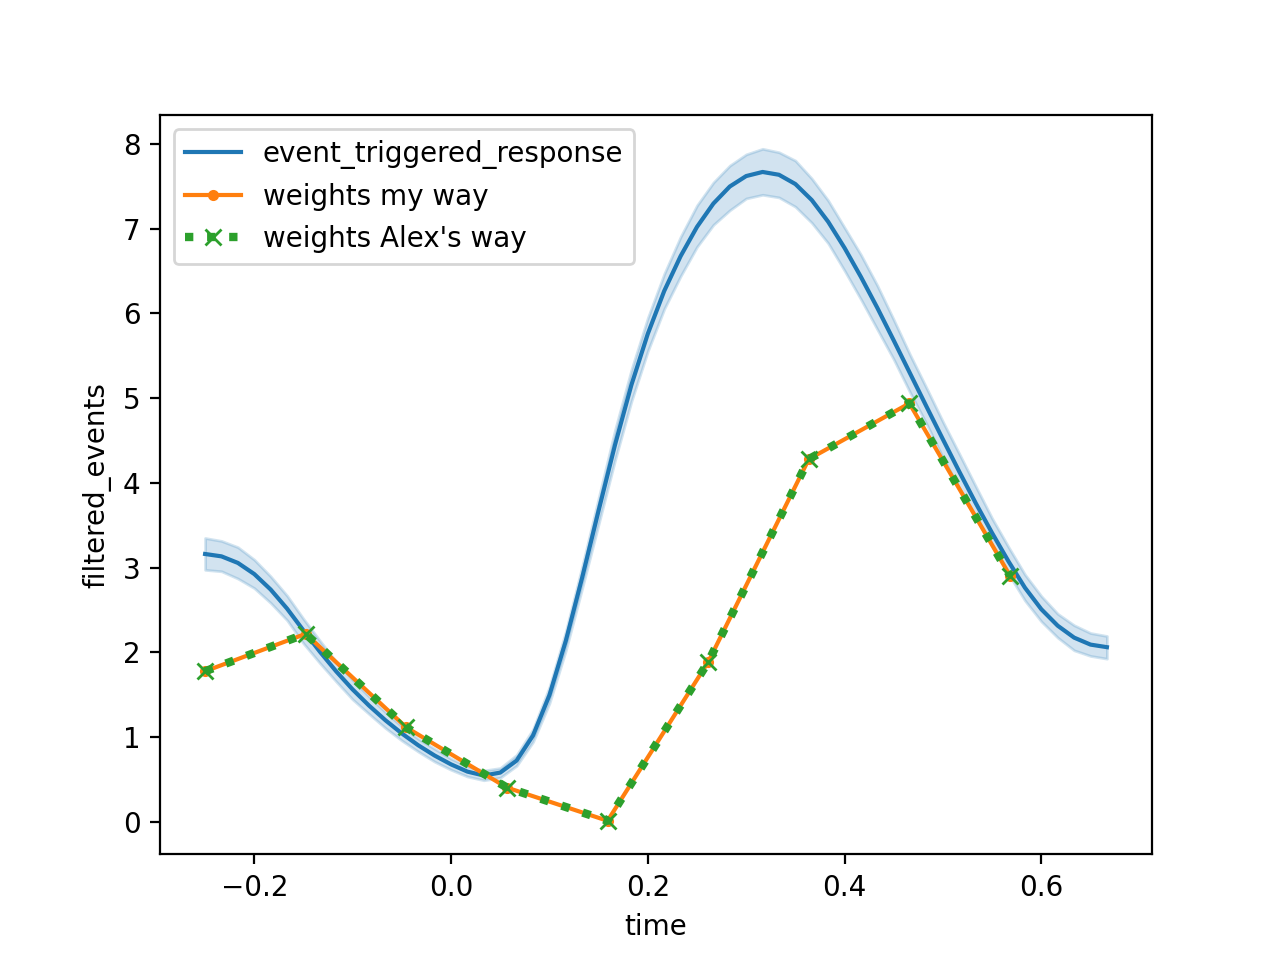

In [136]:
fig, ax = plt.subplots()

sns.lineplot(
    data=etr_all,
    x='time',
    y='filtered_events',
    n_boot=1000,
    ax = ax
)

t_kernel, w_kernel= get_kernel_weights(glm, kernel_name='image4', cell_specimen_id=sample_cell['cell_specimen_id'])
ax.plot(
    t_kernel,
    w_kernel,
    marker = '.'
)

ax.plot(
    t_kernel, 
    weights_df.query('cell_specimen_id == {} and ophys_experiment_id == {}'.format(cell_specimen_id, glm.ophys_experiment_id))['image4_weights'].values[0],
    marker = 'x',
    linestyle = ':',
    linewidth = 3
)

ax.legend(['event_triggered_response','weights my way', "weights Alex's way"])

<IPython.core.display.Javascript object>


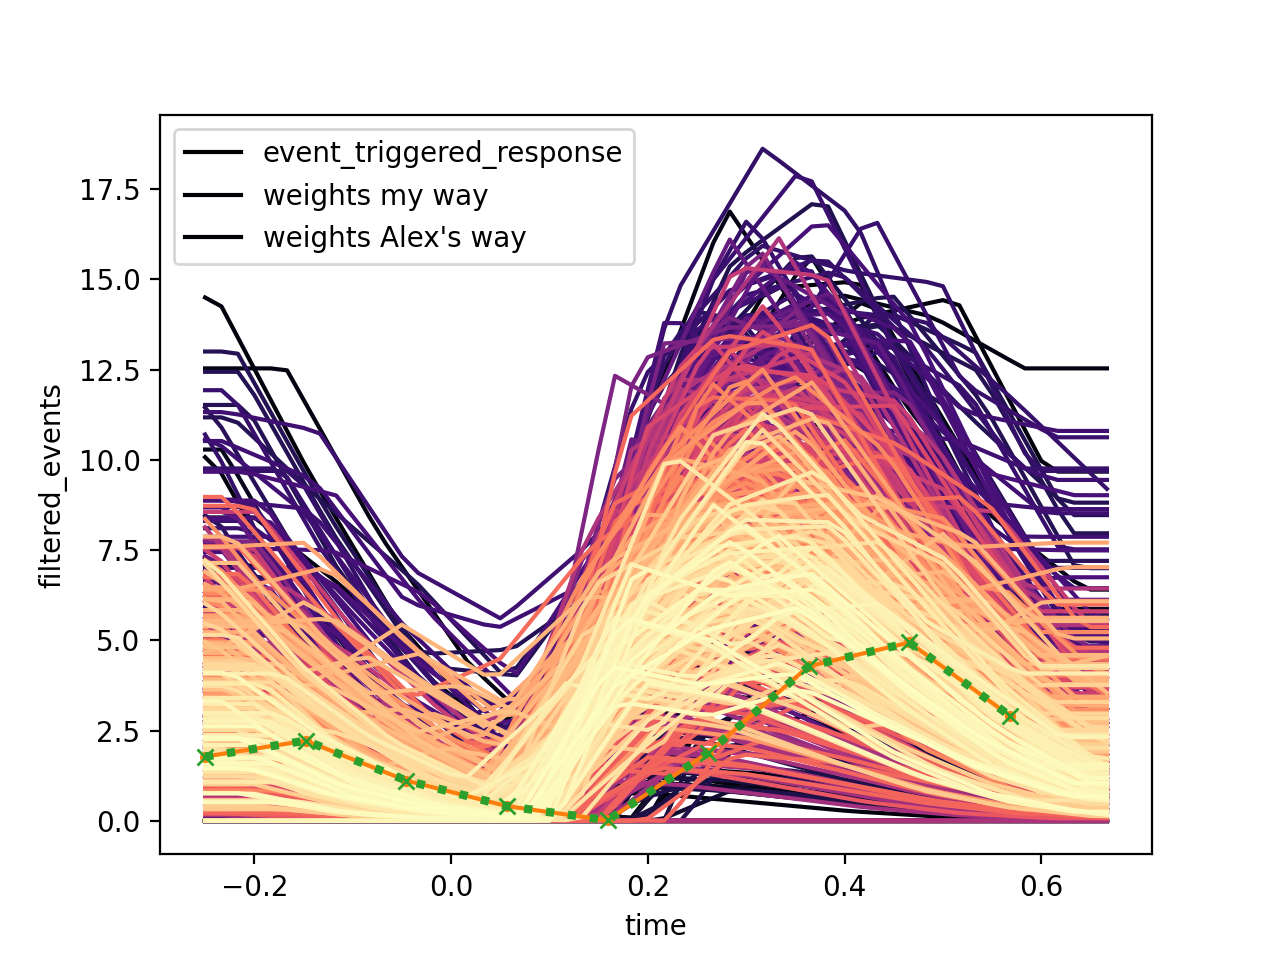

In [121]:
fig, ax = plt.subplots()

sns.lineplot(
    data=etr_all,
    x='time',
    y='filtered_events',
    n_boot=1000,
    ax = ax,
    hue = 'event_number',
    palette = 'magma'
)

t_kernel, w_kernel= get_kernel_weights(glm, kernel_name='image4', cell_specimen_id=sample_cell['cell_specimen_id'])
ax.plot(
    t_kernel,
    w_kernel,
    marker = '.'
)

ax.plot(
    t_kernel, 
    weights_df.query('cell_specimen_id == {} and ophys_experiment_id == {}'.format(cell_specimen_id, glm.ophys_experiment_id))['image4_weights'].values[0],
    marker = 'x',
    linestyle = ':',
    linewidth = 3
)

ax.legend(['event_triggered_response','weights my way', "weights Alex's way"])

In [125]:
t_kernel, w_kernel= get_kernel_weights(glm, kernel_name='image4', cell_specimen_id=sample_cell['cell_specimen_id'])
t_kernel

array([-0.25      , -0.14772727, -0.04545455,  0.05681818,  0.15909091,
        0.26136364,  0.36363636,  0.46590909,  0.56818182])

In [126]:
kernel = 'image4'
run_params = glm.run_params

In [132]:
meso_time_vec = np.arange(run_params['kernels'][kernel]['offset'], run_params['kernels'][kernel]['offset'] + run_params['kernels'][kernel]['length'],1/10.725)

In [133]:
meso_time_vec

array([-0.25      , -0.15675991, -0.06351981,  0.02972028,  0.12296037,
        0.21620047,  0.30944056,  0.40268065,  0.49592075])

In [129]:
len(t_kernel)

9

In [134]:
len(meso_time_vec)

9

In [131]:
glm.session.metadata

{'equipment_name': 'MESO.1',
 'sex': 'F',
 'age_in_days': 162,
 'stimulus_frame_rate': 60.0,
 'session_type': 'OPHYS_4_images_B',
 'date_of_acquisition': Timestamp('2019-07-15 11:15:20.640855+0000', tz='UTC'),
 'reporter_line': 'Ai93(TITL-GCaMP6f)',
 'indicator': 'GCaMP6f',
 'cre_line': 'Slc17a7-IRES2-Cre',
 'behavior_session_uuid': UUID('376e1ae9-8c1b-4aaa-9231-304805d61e8d'),
 'driver_line': ['Camk2a-tTA', 'Slc17a7-IRES2-Cre'],
 'mouse_id': 456915,
 'full_genotype': 'Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-GCaMP6f)/wt',
 'behavior_session_id': 906658064,
 'emission_lambda': 520.0,
 'excitation_lambda': 910.0,
 'experiment_container_id': 1018027657,
 'field_of_view_height': 512,
 'field_of_view_width': 512,
 'imaging_depth': 75,
 'imaging_plane_group': 3,
 'imaging_plane_group_count': 4,
 'ophys_experiment_id': 906910627,
 'ophys_frame_rate': 11.0,
 'ophys_session_id': 906521029,
 'project_code': 'VisualBehaviorMultiscope',
 'targeted_structure': 'VISl'}

In [141]:
fit_arr = glm.fit['fit_trace_arr']
fit_ts = glm.fit['fit_trace_timestamps']

In [148]:
cell_results_df = glm.cell_results_df
cell_results_df

,index,fit_trace_timestamps,cell_specimen_id,fit_array,dff,events,model_prediction,frame_index
0,0,307.33352,1086532150,0.000000,0.075576,0.000000,0.004093,3217
1,1,307.33352,1086519497,0.000000,0.000000,0.000000,-0.000111,3217
2,2,307.33352,1086512045,0.000000,0.112610,0.000000,0.004467,3217
3,3,307.33352,1086525369,0.000000,-0.201025,0.000000,0.016245,3217
4,4,307.33352,1086510676,0.000000,-0.108340,0.000000,0.013984,3217
...,...,...,...,...,...,...,...,...
1701299,1701299,3913.09817,1086525220,0.000000,-0.029458,0.000000,0.015722,41882
1701300,1701300,3913.09817,1086508613,0.000000,-0.107665,0.000000,0.002408,41882
1701301,1701301,3913.09817,1086509036,0.001939,-0.298040,0.001939,-0.008967,41882
1701302,1701302,3913.09817,1086511157,0.000000,0.091192,0.000000,-0.001954,41882


<IPython.core.display.Javascript object>


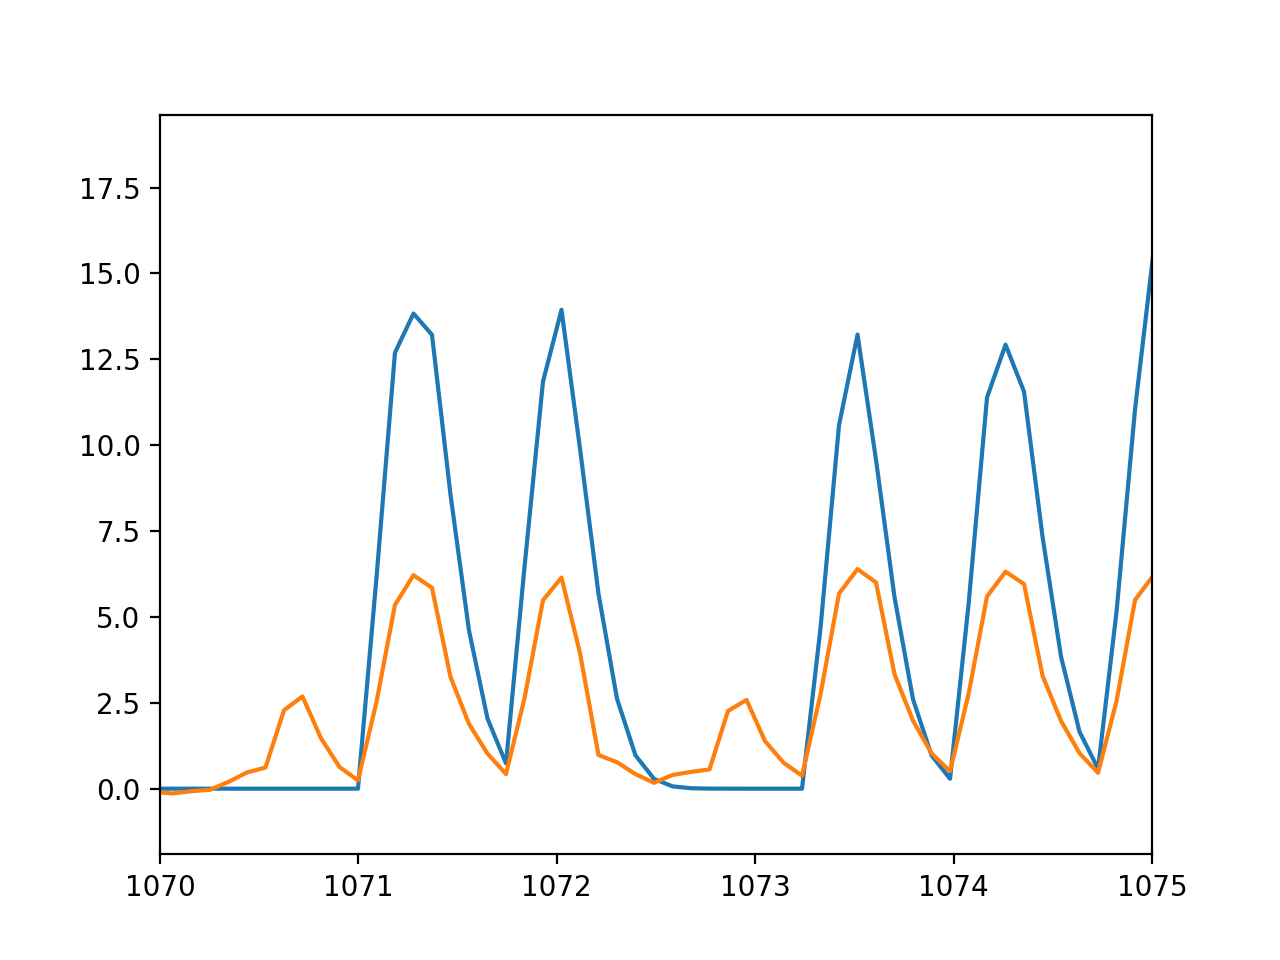

(1070.0, 1075.0)

In [151]:
fig, ax = plt.subplots()
ax.plot(
    fit_ts,
    fit_arr.loc[{'cell_specimen_id':1086519680}].values
)
ax.plot(
    cell_results_df.query('cell_specimen_id == @cell_specimen_id')['fit_trace_timestamps'],
    cell_results_df.query('cell_specimen_id == @cell_specimen_id')['model_prediction']
)


ax.set_xlim(1070,1075)

In [145]:
fit_arr.loc[{'cell_specimen_id':1086519680}].values

array([0., 0., 0., ..., 0., 0., 0.])